In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
import numpy as np
import seaborn as sns
import pandas as pd
from pandas import read_csv
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [ ]:
# load the dataset
data = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(data, header=None)


In [ ]:
df.shape

(506, 14)

In [ ]:

df.head()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.columns = ['CRIM', 'ZN', 'INDUS','CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
                 'B', 'LSTAT', 'MEDV']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# from sklearn import preprocessing
# d = preprocessing.normalize(df)
# scaled_df = pd.DataFrame(d)
# scaled_df.head()


In [ ]:
#scaled_df.describe()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


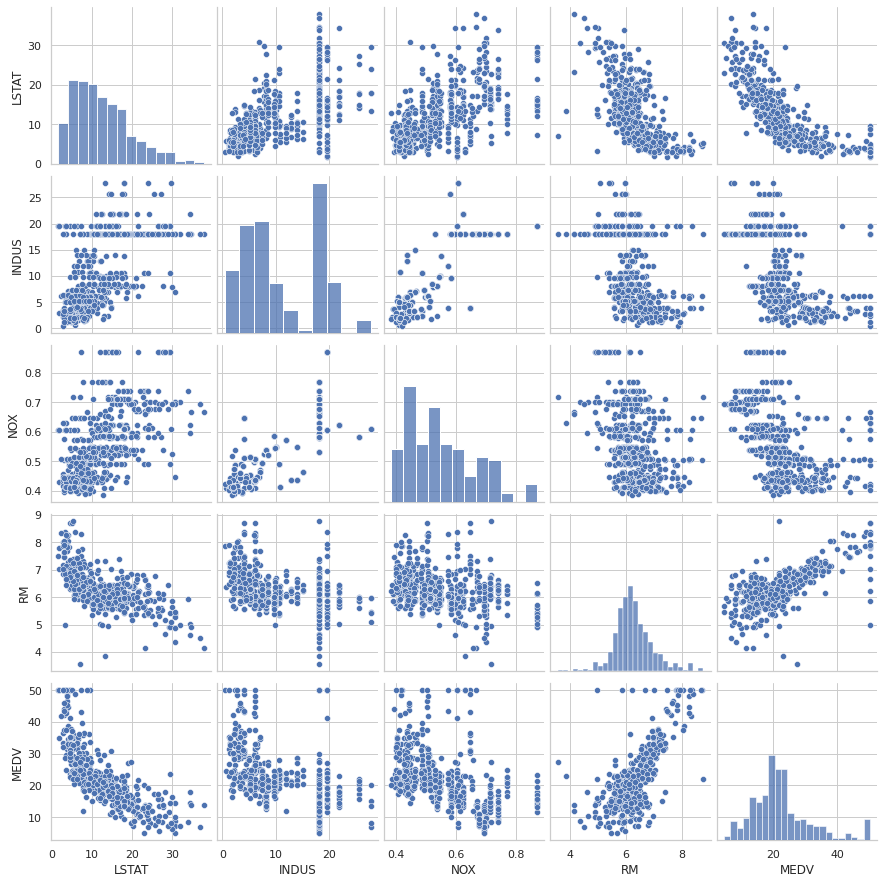

In [ ]:
df.columns = ['CRIM', 'ZN', 'INDUS','CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
                 'B', 'LSTAT', 'MEDV']
                 
#View pairwise plots between different features
sns.set(style='whitegrid',context='notebook')
cols=['LSTAT','INDUS','NOX','RM','MEDV']
sns.pairplot(df[cols],size=2.5)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


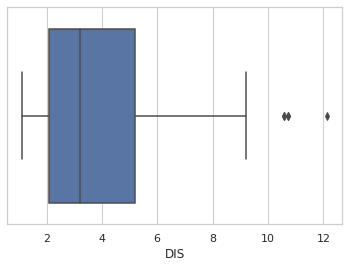

In [ ]:
#Boxplot
#Boxplot summarizes a sample data using 25th, 50th, and 75th percentiles

sns.boxplot(df['DIS'])
#see that values above 10 are acting as the outliers.

In [ ]:
# Position of the Outlier
print(np.where(df['DIS']>10))

(array([351, 352, 353, 354, 355]),)


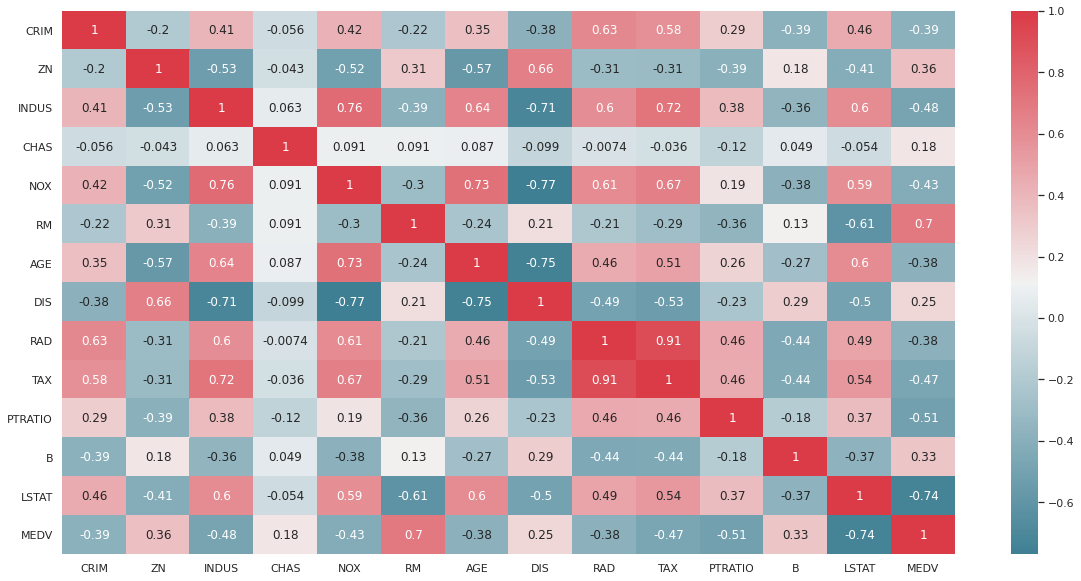

In [ ]:
#correlation matrix to quantify linear relationship between the features

def correlation_heatmap(df):
    _,ax=plt.subplots(figsize=(20,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(df)

#LSTAT(percentage lower status) most negatively correlated with MEDV (house price)
#RM(number of rooms) is positive correlation with MEDV.
#Now that we have got enough inofrmation about the data, we start linear regression.

Text(0.5, 1.0, 'Relationship between RM and Price')

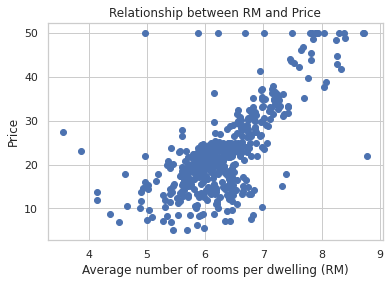

In [ ]:
#Price vs RM
#Price increases linearly with number of rooms, but there are some outliers

# Plot price vs average number of rooms
plt.scatter(df.RM, df.MEDV)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Price")
plt.title("Relationship between RM and Price")

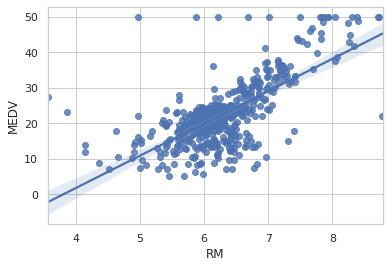

In [ ]:
# Using seaborn regplot provides a quick automatic linear regression fit
sns.regplot(y="MEDV", x="RM", data=df, fit_reg = True)

Text(0.5, 1.0, 'Relationship between CRIM and Price')

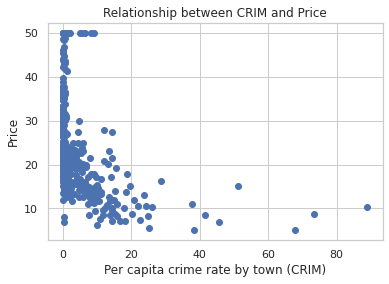

In [ ]:
#Price vs Crime Rate

# How price varies as a function of per capita crime rate
plt.scatter(df.CRIM, df.MEDV)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Price")
plt.title("Relationship between CRIM and Price")

In [ ]:
# retrieve the array
data = df.values

# split into input and output elements
X, y = data[:, :-1], data[:, -1]

# summarize the shape of the dataset
print("Original Dataset-->",(X.shape, y.shape))

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# summarize the shape of the train and test sets
print("Train Dataset-->", X_train.shape,y_train.shape)
print("Test Dataset-->", X_test.shape,y_test.shape)

Original Dataset--> ((506, 13), (506,))
Train Dataset--> (379, 13) (379,)
Test Dataset--> (127, 13) (127,)


In [ ]:
########Base Line - Without Outliers Removed ##############

# evaluate model on the raw dataset
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_test)

# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 3.575


In [ ]:
#displaying the comparision btween actual and predicted values of MEDV
Y_compare_linear = pd.DataFrame({'Actual': y_test, 'Predicted': yhat})
Y_compare_linear.head() 

,Actual,Predicted
0,28.2,32.316479
1,23.9,27.876253
2,16.6,17.986966
3,22.0,21.652534
4,20.8,18.843856


In [ ]:
##########Outliers Detected with Isolation Forest, Outliers Removed and Linear Regression Tested############

from sklearn.ensemble import IsolationForest

# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)

# summarize the shape of the training dataset
print("Traing dataset shape before implementing IF algorithm: ", X_train.shape, y_train.shape)
print("\n")

# select all rows that are not outliers
mask = yhat != -1
X_trainIF, y_trainIF = X_train[mask, :], y_train[mask]

# summarize the shape of the updated training dataset
print("Training dataset shape after implementing IF algorithm: ", X_trainIF.shape, y_trainIF.shape)
print("\n")

# fit the model
model = LinearRegression()
model.fit(X_trainIF, y_trainIF)

# evaluate the model
yhat = model.predict(X_test)

# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE of Isolation Forest: %.3f' % mae)



Traing dataset shape before implementing IF algorithm:  (379, 13) (379,)


Training dataset shape after implementing IF algorithm:  (341, 13) (341,)


MAE of Isolation Forest: 3.578


In [ ]:
#displaying the comparision btween actual and predicted values of MEDV
Y_compare_IF = pd.DataFrame({'Actual': y_test, 'Predicted': yhat})
Y_compare_IF.head() 

,Actual,Predicted
0,28.2,32.316479
1,23.9,27.876253
2,16.6,17.986966
3,22.0,21.652534
4,20.8,18.843856


In [ ]:
##########Outliers Detected with Minimum Covariance Determinant, Outliers Removed and Linear Regression Tested############
from sklearn.covariance import EllipticEnvelope

# identify outliers in the training dataset
ee = EllipticEnvelope(contamination=0.02)
yhat = ee.fit_predict(X_train)

# summarize the shape of the training dataset
print("Training dataset shape before implementing MCD: ", X_train.shape, y_train.shape)
print("\n")

# select all rows that are not outliers
mask = yhat != -1
X_trainCD, y_trainCD = X_train[mask, :], y_train[mask]

# summarize the shape of the updated training dataset
print("Traing dataset shape after implementing MCD: ", X_trainCD.shape, y_trainCD.shape)
print("\n")

# fit the model
model = LinearRegression()
model.fit(X_trainCD, y_trainCD)

# evaluate the model
yhat = model.predict(X_test)

# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE of Minimum Covariance Determinant: %.3f' % mae)



Training dataset shape before implementing MCD:  (379, 13) (379,)


Traing dataset shape after implementing MCD:  (371, 13) (371,)


MAE of Minimum Covariance Determinant: 3.556


In [ ]:
#displaying the comparision btween actual and predicted values of MEDV
Y_compare_MCD = pd.DataFrame({'Actual': y_test, 'Predicted': yhat})
Y_compare_MCD.head() 

,Actual,Predicted
0,28.2,32.316479
1,23.9,27.876253
2,16.6,17.986966
3,22.0,21.652534
4,20.8,18.843856


In [ ]:
##########Outliers Detected with One Class SVM (OCSVM), Outliers Removed and Linear Regression Tested############
from sklearn.svm import OneClassSVM

# identify outliers in the training dataset
ee = OneClassSVM(nu=0.01)
yhat = ee.fit_predict(X_train)

# summarize the shape of the training dataset
print("Training dataset shape before implementing OCSVM: ", X_train.shape, y_train.shape)
print("\n")

# select all rows that are not outliers
mask = yhat != -1
X_trainSVM, y_trainSVM = X_train[mask, :], y_train[mask]

# summarize the shape of the updated training dataset
print("Traing dataset shape after implementing OCSVM: ", X_trainSVM.shape, y_trainSVM.shape)
print("\n")

# fit the model
model = LinearRegression()
model.fit(X_trainSVM, y_trainSVM)

# evaluate the model
yhat = model.predict(X_test)

# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE of One Class SVM: %.3f' % mae)



Training dataset shape before implementing OCSVM:  (379, 13) (379,)


Traing dataset shape after implementing OCSVM:  (375, 13) (375,)


MAE of One Class SVM: 3.577


In [ ]:
#displaying the comparision btween actual and predicted values of MEDV
Y_compare_OCSVM = pd.DataFrame({'Actual': y_test, 'Predicted': yhat})
Y_compare_OCSVM.head() 

,Actual,Predicted
0,28.2,32.316479
1,23.9,27.876253
2,16.6,17.986966
3,22.0,21.652534
4,20.8,18.843856


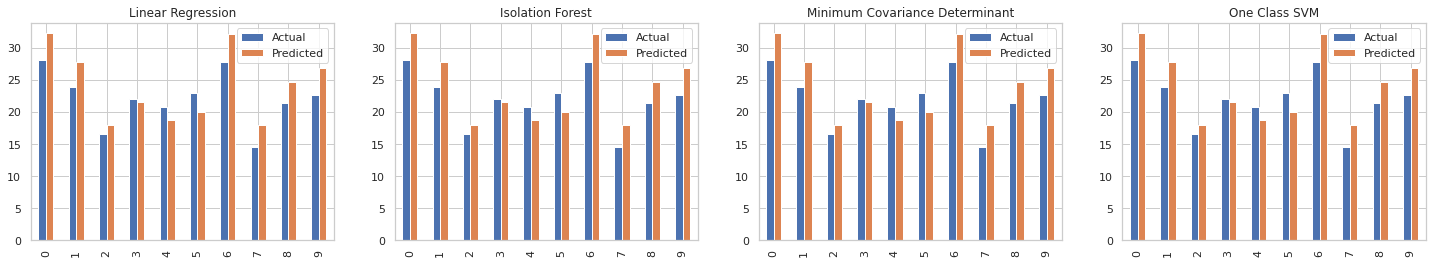

In [ ]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(25, 4))
ax = ax.flatten()
Y_compare_linear.head(10).plot(kind='bar', title='Linear Regression', grid=True, ax=ax[0])
Y_compare_IF.head(10).plot(kind='bar', title='Isolation Forest', grid=True, ax=ax[1])
Y_compare_MCD.head(10).plot(kind='bar', title='Minimum Covariance Determinant', grid=True, ax=ax[2])
Y_compare_OCSVM.head(10).plot(kind='bar', title='One Class SVM', grid=True, ax=ax[3])
plt.show()

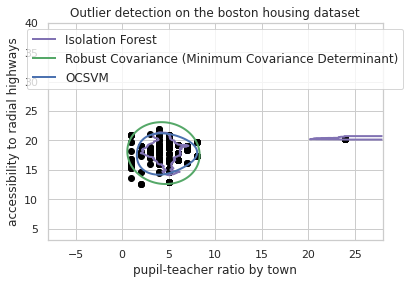

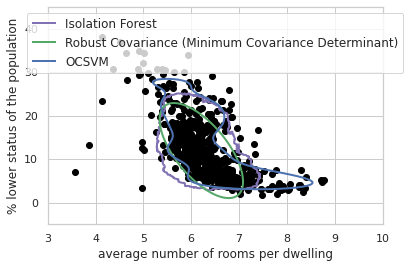

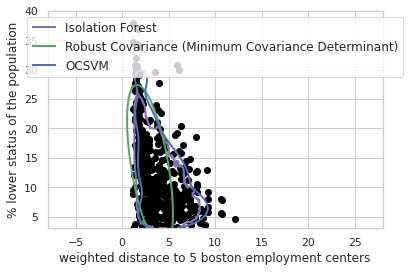

In [ ]:
from sklearn.datasets import load_boston

X1 = load_boston()['data'][:, [8, 10]]  # RAD & pupil-teacher-ratio: accessibility to radial highways
X2 = load_boston()['data'][:, [5, 12]]  # RM & LSAT: percent lower stats of the population
X3 = load_boston()['data'][:, [7, 12]]  # DIS & LSAT: percent lower stats of the population

# Define "classifiers" to be used
classifiers = {
    "Isolation Forest": IsolationForest(#support_fraction = the proportion of points to be included in the support of the estimate
                                             contamination=0.2),
    "Robust Covariance (Minimum Covariance Determinant)": EllipticEnvelope(contamination=0.3),
    "OCSVM": OneClassSVM(nu=0.2, gamma=0.05)}
colors = ['m', 'g', 'b']
legend1 = {}
legend2 = {}
legend3 = {}

# Outlier detection with several classifiers
xx1, yy1 = np.meshgrid(np.linspace(-8, 28, 500), np.linspace(3, 40, 500))
xx2, yy2 = np.meshgrid(np.linspace(3, 10, 500), np.linspace(-5, 45, 500))
xx3, yy3 = np.meshgrid(np.linspace(-8, 28, 500), np.linspace(3, 40, 500))

for i, (clf_name, clf) in enumerate(classifiers.items()):

    plt.figure(1)
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i])

    plt.figure(2)
    clf.fit(X2)
    Z2 = clf.decision_function(np.c_[xx2.ravel(), yy2.ravel()])
    Z2 = Z2.reshape(xx2.shape)
    legend2[clf_name] = plt.contour(
        xx2, yy2, Z2, levels=[0], linewidths=2, colors=colors[i])
    
    plt.figure(3)
    clf.fit(X3)
    Z3 = clf.decision_function(np.c_[xx3.ravel(), yy3.ravel()])
    Z3 = Z3.reshape(xx3.shape)
    legend3[clf_name] = plt.contour(
        xx3, yy3, Z3, levels=[0], linewidths=2, colors=colors[i])
    

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Plot the results
plt.figure(1)  
plt.title("Outlier detection on the boston housing dataset")
plt.scatter(X1[:, 0], X1[:, 1], color='black')
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
# plt.annotate("several confounded points", xy=(24, 19),
#              xycoords="data", textcoords="data",
#              xytext=(13, 10), bbox=bbox_args, arrowprops=arrow_args)
plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend((legend1_values_list[0].collections[0],
            legend1_values_list[1].collections[0],
            legend1_values_list[2].collections[0]),
           (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=12))
plt.ylabel("accessibility to radial highways")
plt.xlabel("pupil-teacher ratio by town")

legend2_values_list = list(legend2.values())
legend2_keys_list = list(legend2.keys())

plt.figure(2)  # "banana" shape
plt.scatter(X2[:, 0], X2[:, 1], color='black')
plt.xlim((xx2.min(), xx2.max()))
plt.ylim((yy2.min(), yy2.max()))
plt.legend((legend2_values_list[0].collections[0],
            legend2_values_list[1].collections[0],
            legend2_values_list[2].collections[0]),
           (legend2_keys_list[0], legend2_keys_list[1], legend2_keys_list[2]),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=12))
plt.ylabel("% lower status of the population")
plt.xlabel("average number of rooms per dwelling")


legend3_values_list = list(legend3.values())
legend3_keys_list = list(legend3.keys())

plt.figure(3)  
plt.scatter(X3[:, 0], X3[:, 1], color='black')
plt.xlim((xx3.min(), xx3.max()))
plt.ylim((yy3.min(), yy3.max()))
plt.legend((legend3_values_list[0].collections[0],
            legend3_values_list[1].collections[0],
            legend3_values_list[2].collections[0]),
           (legend3_keys_list[0], legend3_keys_list[1], legend3_keys_list[2]),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=12))
plt.ylabel("% lower status of the population")
plt.xlabel("weighted distance to 5 boston employment centers")

plt.show()